In [1]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
lable = ["飛機", "汽車", "鳥", "貓", "鹿", "狗", "青蛙", "馬", "船", "卡車"]

船


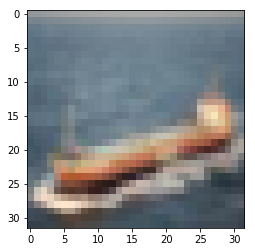

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
print(lable[y_train[c][0]])
plt.imshow(x_train[c])

In [5]:
x_train_shape = x_train / 255
x_test_shape = x_test / 255
# y進去的時候要one-hot encoding 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# Demo
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense
from keras.layers import Flatten
cnn = Sequential()
# 9(格子) * 3(RGB) * 32(filters) + 32(bias)
cnn.add(Conv2D(32, (3, 3),
               activation="relu",
               padding="same",
               input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# 9 * 32(上一層特徵) * 64 + 64
cnn.add(Conv2D(64, (3, 3),
               activation="relu",
               padding="same"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# 9 * 32(上一層特徵) * 64 + 64
cnn.add(Conv2D(128, (3, 3),
               activation="relu",
               padding="same"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# MLP(大腦)
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
__________

In [7]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [8]:
cnn.fit(x_train_shape, y_train_cat, batch_size=200, epochs=10, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 63s 1ms/step - loss: 1.5834 - acc: 0.4281 - val_loss: 1.3065 - val_acc: 0.5414
Epoch 2/10
45000/45000 [==============================] - 64s 1ms/step - loss: 1.1693 - acc: 0.5885 - val_loss: 1.0497 - val_acc: 0.6372
Epoch 3/10
45000/45000 [==============================] - 64s 1ms/step - loss: 0.9937 - acc: 0.6538 - val_loss: 0.9609 - val_acc: 0.6694
Epoch 4/10
45000/45000 [==============================] - 64s 1ms/step - loss: 0.8854 - acc: 0.6908 - val_loss: 0.9262 - val_acc: 0.6754
Epoch 5/10
45000/45000 [==============================] - 63s 1ms/step - loss: 0.8061 - acc: 0.7218 - val_loss: 0.8471 - val_acc: 0.7136
Epoch 6/10
45000/45000 [==============================] - 63s 1ms/step - loss: 0.7343 - acc: 0.7470 - val_loss: 0.7915 - val_acc: 0.7304
Epoch 7/10
45000/45000 [==============================] - 62s 1ms/step - loss: 0.6653 - acc: 0.7724 - val_loss: 0.8241 - val_acc:

In [9]:
cnn.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 5s 550us/step


[0.8476099356651307, 0.7181]

In [10]:
cnn.save("simplecnn.h5")

In [ ]:
# https://support.hdfgroup.org/products/java/release/download.html
from keras.models import load_model
old = load_model("simplecnn.h5")
old.evaluate(x_test_shape, y_test_cat)

In [13]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pd.DataFrame(confusion_matrix(y_test, cnn.predict_classes(x_test_shape)))

,0,1,2,3,4,5,6,7,8,9
0,886,20,48,4,7,7,1,5,14,8
1,32,914,5,7,1,3,7,2,6,23
2,76,9,780,27,26,33,23,20,4,2
3,54,19,149,510,39,143,49,23,9,5
4,57,10,190,46,555,31,47,57,4,3
5,35,13,129,144,29,587,16,36,8,3
6,19,9,104,43,12,23,781,4,2,3
7,36,8,71,32,28,43,4,771,1,6
8,141,66,23,10,3,6,1,2,737,11
9,79,177,28,16,1,6,4,12,17,660
